In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Loading data
df1 = pd.read_csv('D:/Second semester/Intro to AI/project/dataset/ancona_data.csv')
df2 = pd.read_csv('D:/Second semester/Intro to AI/project/dataset/athens_data.csv')

# seeing sample of data
print(df1.head())
print(df2.head())

                  Date        NO2         O3       PM10     PM2.5   Latitude  \
0  2021-09-01 01:00:00   7.000000  53.000000  15.000000  4.000000  43.612386   
1  2021-09-01 01:00:00   8.000000        NaN   9.000000       NaN  43.527982   
2  2021-09-01 01:00:00   9.035176  49.232338  10.681684  7.700312  43.450000   
3  2021-09-01 01:00:00  10.292098  51.336113  10.310384  6.732396  43.550000   
4  2021-09-01 01:00:00   8.348963  39.351303  10.273862  7.066792  43.550000   

   Longitude            station_name  Wind-Speed (U)  Wind-Speed (V)  \
0  13.510830        Ancona Citadella       -0.528286       -0.987673   
1  13.246672                    Jesi       -0.529657       -0.987282   
2  13.250000  Ancona CAMS Station 11       -0.529798       -0.987225   
3  13.450000   Ancona CAMS Station 8       -0.528619       -0.987565   
4  13.150000   Ancona CAMS Station 5       -0.530069       -0.987179   

   Dewpoint Temp  Soil Temp  Total Percipitation  Vegitation (High)  \
0      63.56378

In [3]:
columns_ord = df1.columns

# Re-ordering the columns of 2nd dataframe as 1st dataframe
df2 = df2[columns_ord]

In [4]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417626 entries, 0 to 417625
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 417626 non-null  object 
 1   NO2                  409848 non-null  float64
 2   O3                   392823 non-null  float64
 3   PM10                 389767 non-null  float64
 4   PM2.5                372508 non-null  float64
 5   Latitude             417626 non-null  float64
 6   Longitude            417626 non-null  float64
 7   station_name         417626 non-null  object 
 8   Wind-Speed (U)       417626 non-null  float64
 9   Wind-Speed (V)       417626 non-null  float64
 10  Dewpoint Temp        417626 non-null  float64
 11  Soil Temp            417626 non-null  float64
 12  Total Percipitation  417626 non-null  float64
 13  Vegitation (High)    417626 non-null  float64
 14  Vegitation (Low)     417626 non-null  float64
 15  Temp             

In [5]:
# converting date column into datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# dropping unnecessary columns
df1 = df1.drop(columns=['id', 'code'])

df2 = df2.drop(columns=['id', 'code'])

In [6]:
df1['Date'].info()
df2['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 417626 entries, 0 to 417625
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
417626 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB
<class 'pandas.core.series.Series'>
RangeIndex: 1726464 entries, 0 to 1726463
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1726464 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.2 MB


In [7]:
df1.head(5)

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435
1,2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001


In [8]:
df2.head()


,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812
1,2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731
2,2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317
3,2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915
4,2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202


In [9]:
df1.isnull().sum().sort_values(ascending=True)

Date                       0
Vegitation (Low)           0
Vegitation (High)          0
Total Percipitation        0
Soil Temp                  0
Dewpoint Temp              0
Wind-Speed (V)             0
Temp                       0
Wind-Speed (U)             0
Longitude                  0
Latitude                   0
station_name               0
Relative Humidity          0
NO2                     7778
O3                     24803
PM10                   27859
PM2.5                  45118
dtype: int64

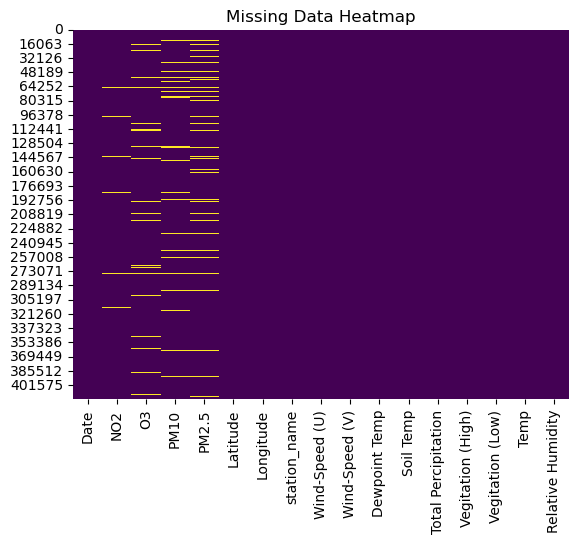

In [10]:
# Visualize missing data (optional)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [11]:
# Function to fill missing values with upper 3 and down 3 values mean for df1
def fill_missing_values(df1, column):
    for i in range(len(df1)):
        if pd.isna(df1[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df1[column][i - j]):
                    up_sum += df1[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df1):
                if not pd.isna(df1[column][i + k]):
                    down_sum += df1[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df1.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['NO2', 'O3', 'PM10', 'PM2.5']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df1, column)

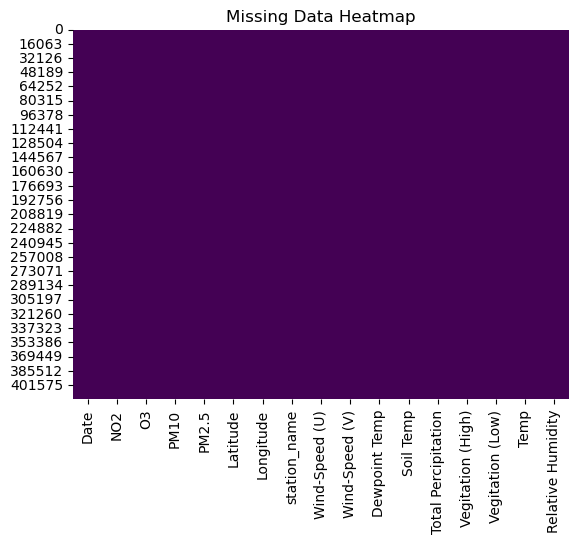

In [12]:
# Visualize missing data (optional)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

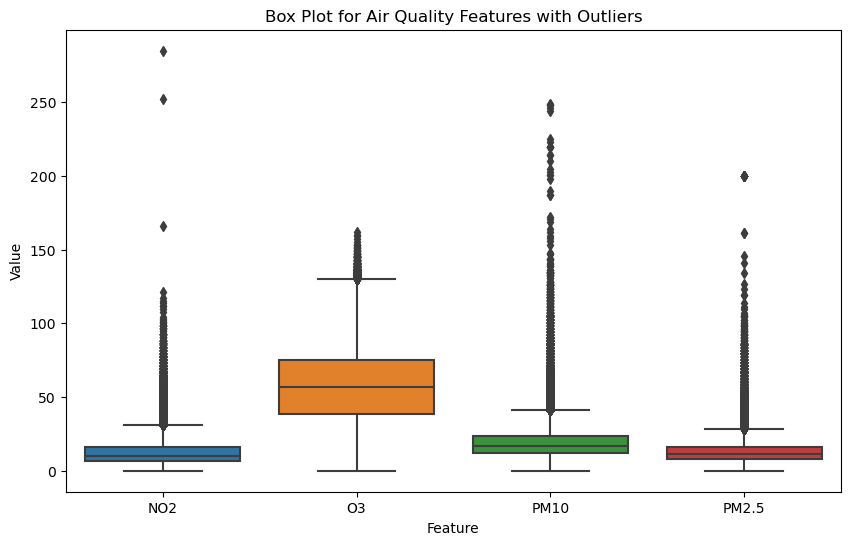

In [12]:
# Melt the DataFrame to long format
df_melted = df1.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity'], 
                     value_vars=['NO2', 'O3', 'PM10', 'PM2.5'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.show()

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726464 entries, 0 to 1726463
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   NO2                  float64
 2   O3                   float64
 3   PM10                 float64
 4   PM2.5                float64
 5   Latitude             float64
 6   Longitude            float64
 7   station_name         object 
 8   Wind-Speed (U)       float64
 9   Wind-Speed (V)       float64
 10  Dewpoint Temp        float64
 11  Soil Temp            float64
 12  Total Percipitation  float64
 13  Vegitation (High)    float64
 14  Vegitation (Low)     float64
 15  Temp                 float64
 16  Relative Humidity    float64
dtypes: float64(15), object(2)
memory usage: 223.9+ MB


In [16]:
# checking Null values in dataframe 2
df2.isnull().sum().sort_values(ascending=True)

Date                        0
PM10                        0
PM2.5                       0
Latitude                    0
Longitude                   0
station_name                0
Temp                     7565
Vegitation (Low)         8573
Vegitation (High)        8573
Total Percipitation      8573
Soil Temp                8573
Wind-Speed (U)           8573
Wind-Speed (V)           8573
Dewpoint Temp            8573
Relative Humidity        8573
NO2                    143293
O3                     148064
dtype: int64

In [13]:
# Function to fill missing values with upper 3 and down 3 values mean of df2
def fill_missing_values(df2, column):
    for i in range(len(df2)):
        if pd.isna(df2[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df2[column][i - j]):
                    up_sum += df2[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df2):
                if not pd.isna(df2[column][i + k]):
                    down_sum += df2[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df2.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['Temp', 'Vegitation (Low)', 'Vegitation (High)', 'Total Percipitation',
    'Soil Temp', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp','Relative Humidity', 'NO2', 'O3']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df2, column)

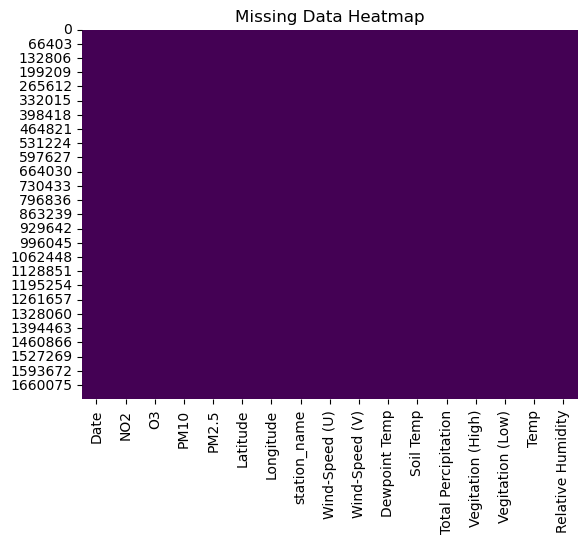

In [14]:
# Visualize missing data (optional)
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

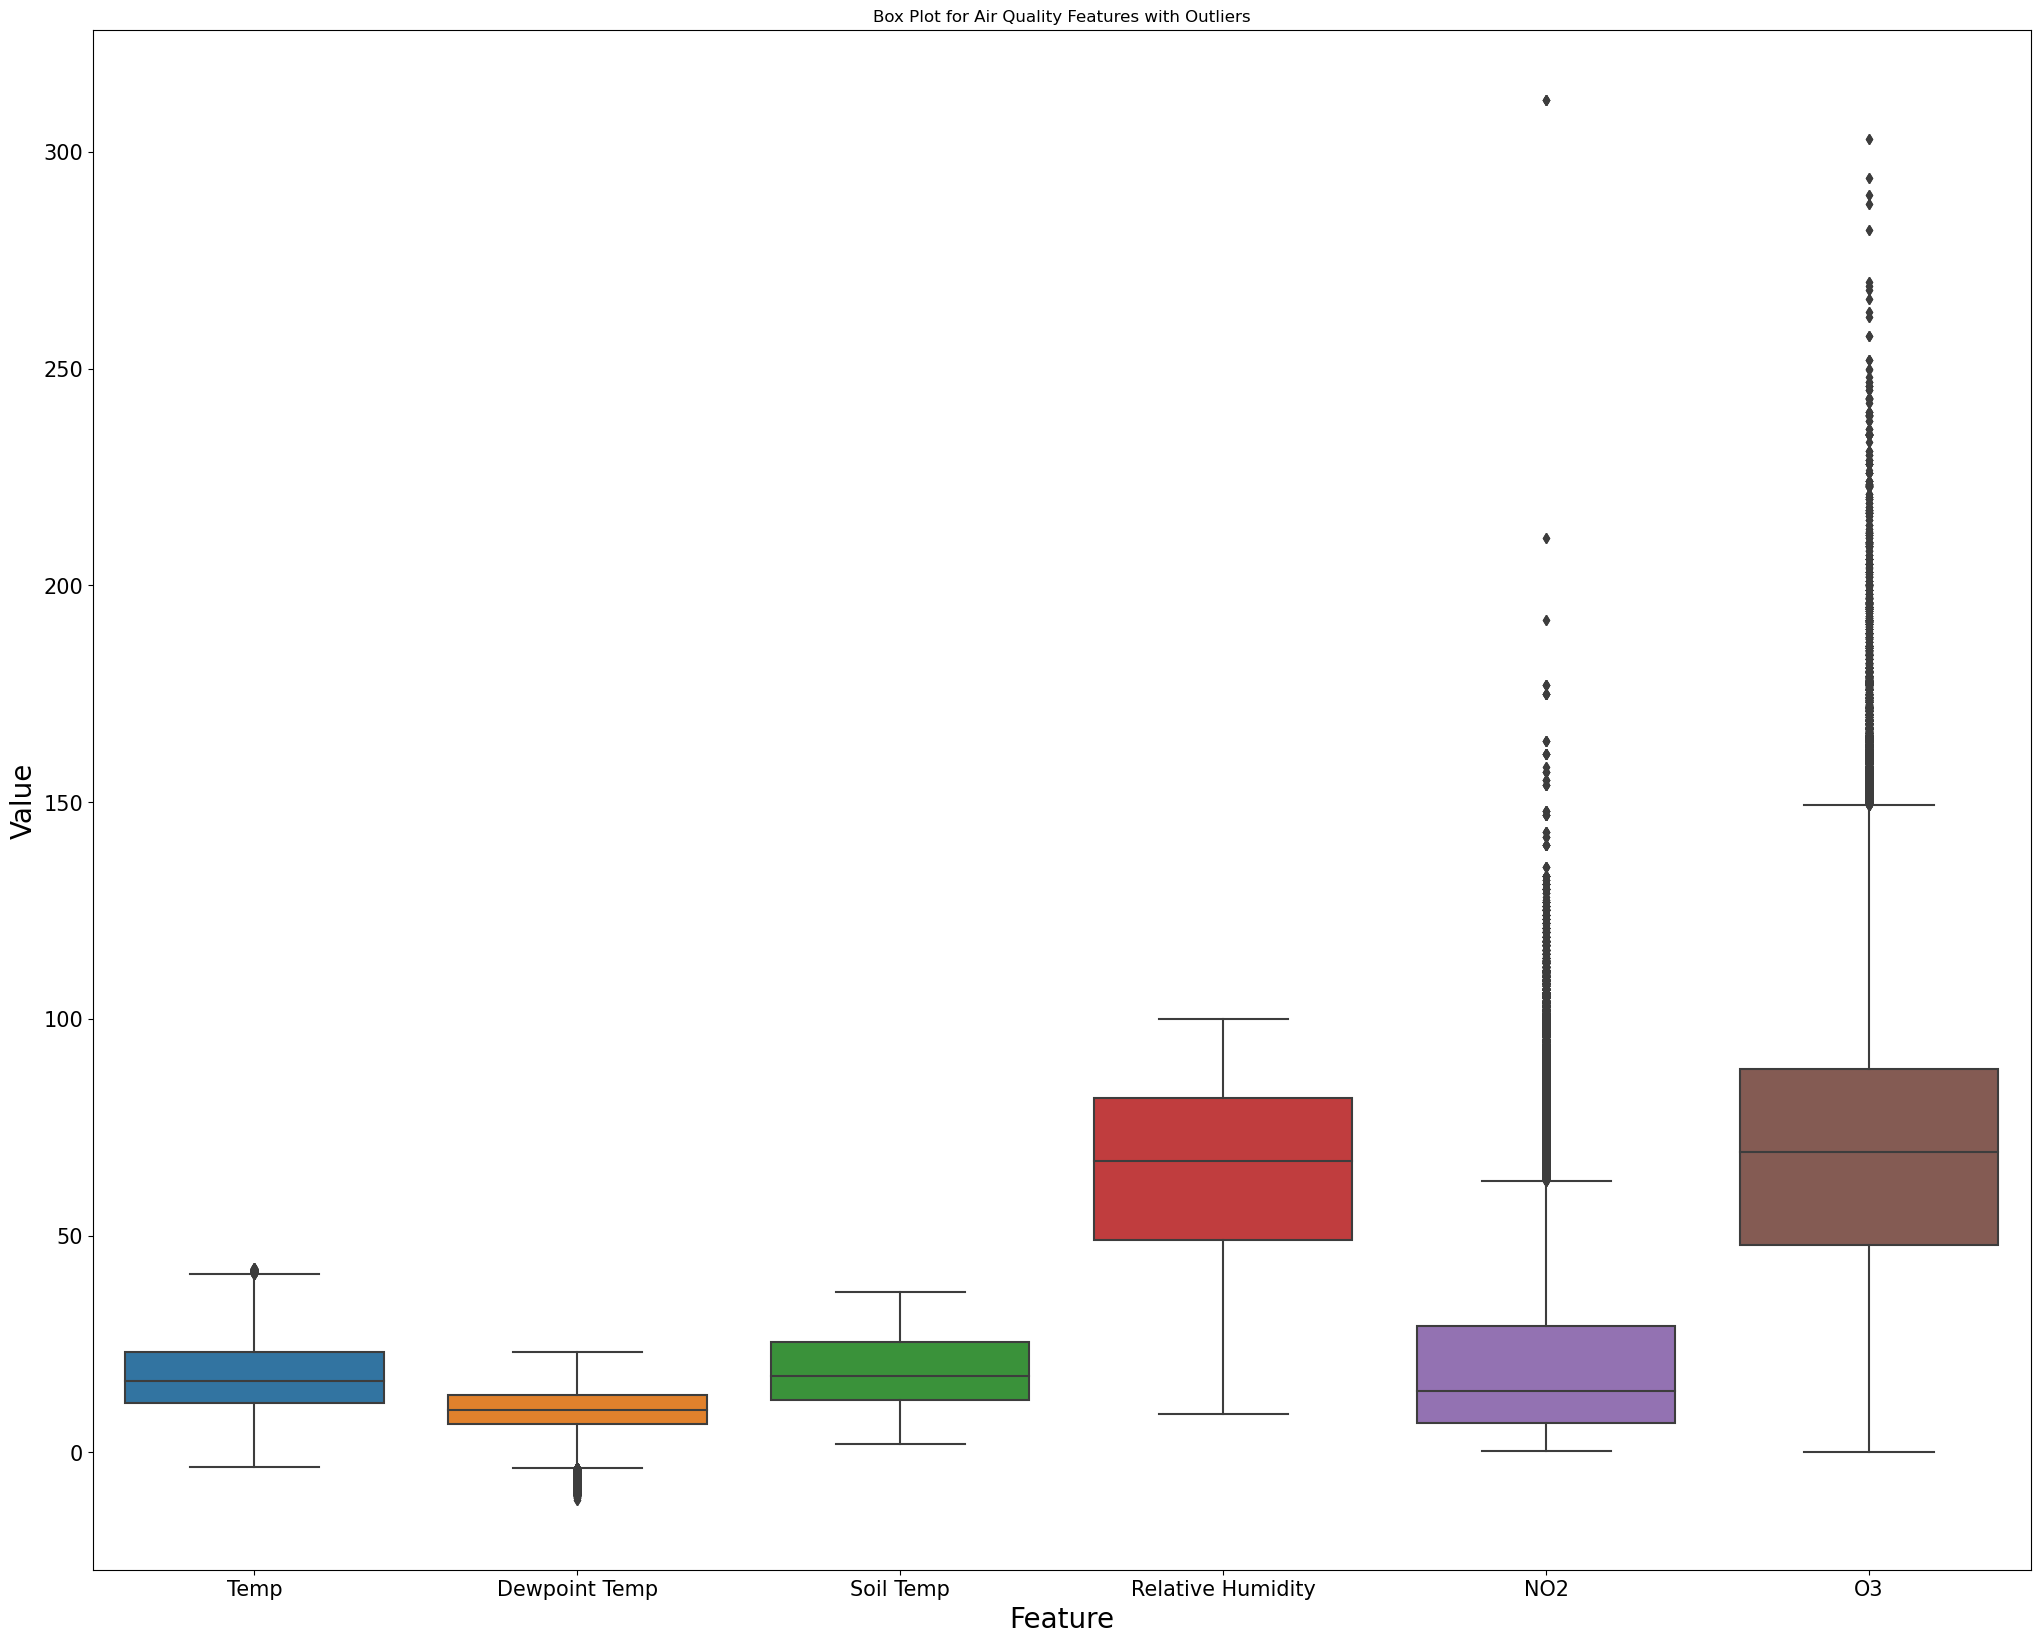

In [9]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'], 
                     value_vars=['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'NO2', 'O3'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

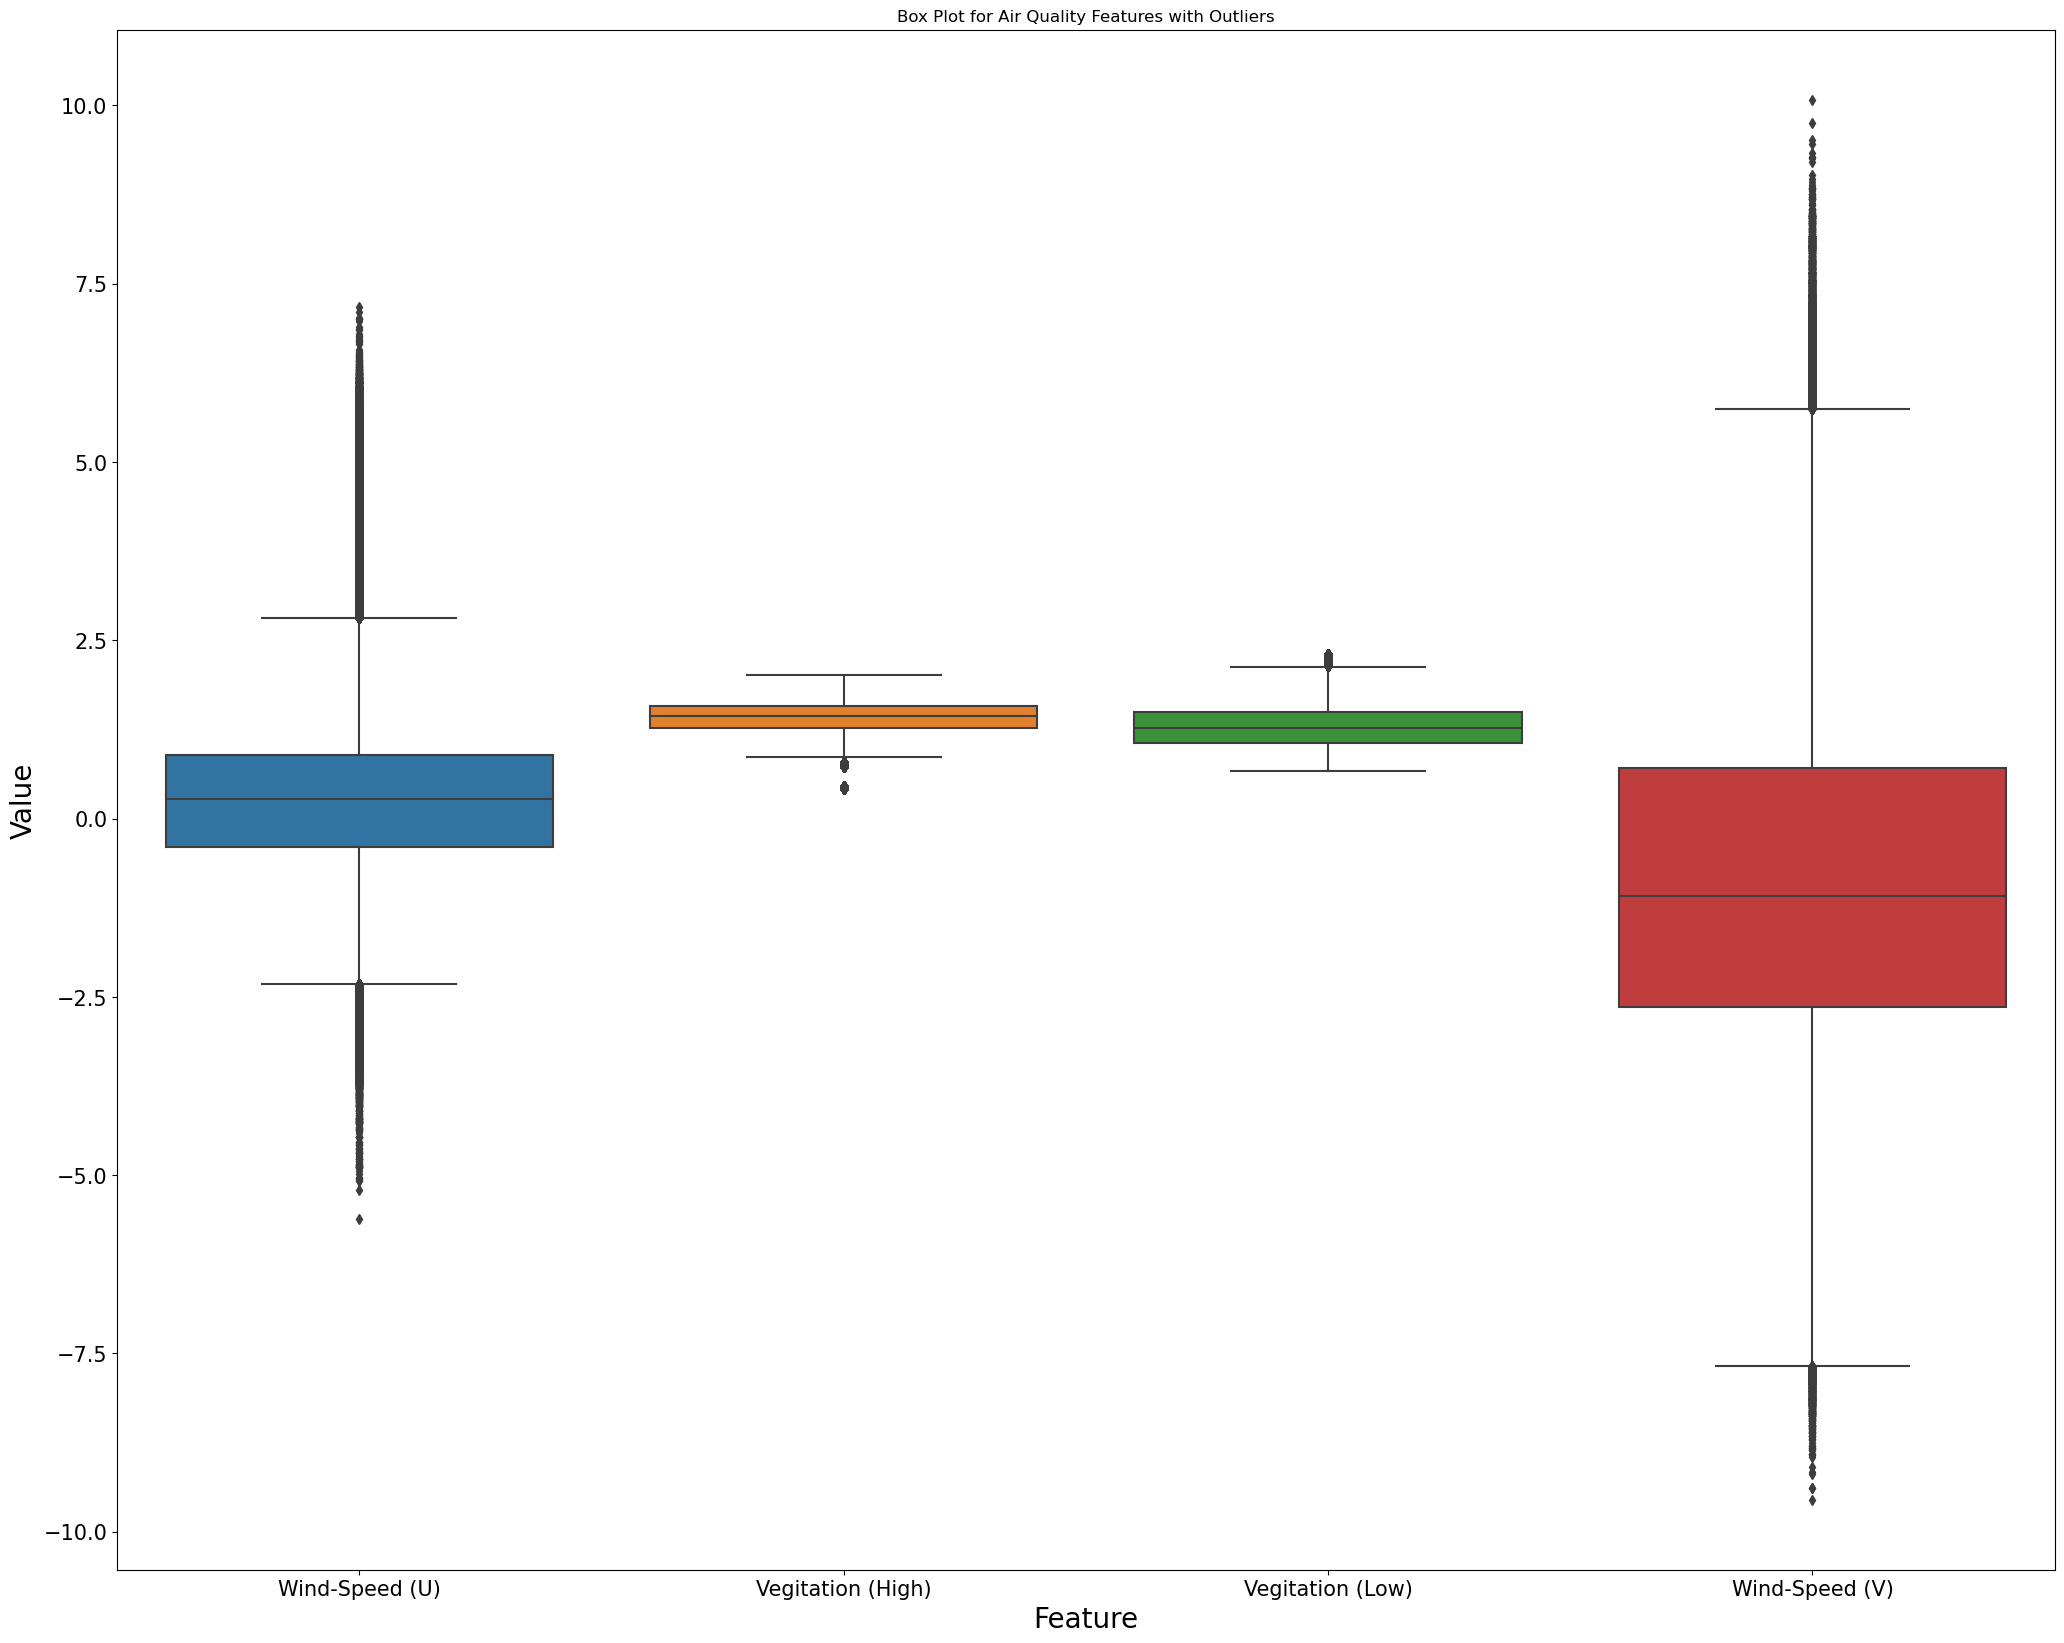

In [18]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'], 
                     value_vars=['Wind-Speed (U)', 'Vegitation (High)', 'Vegitation (Low)', 'Wind-Speed (V)'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

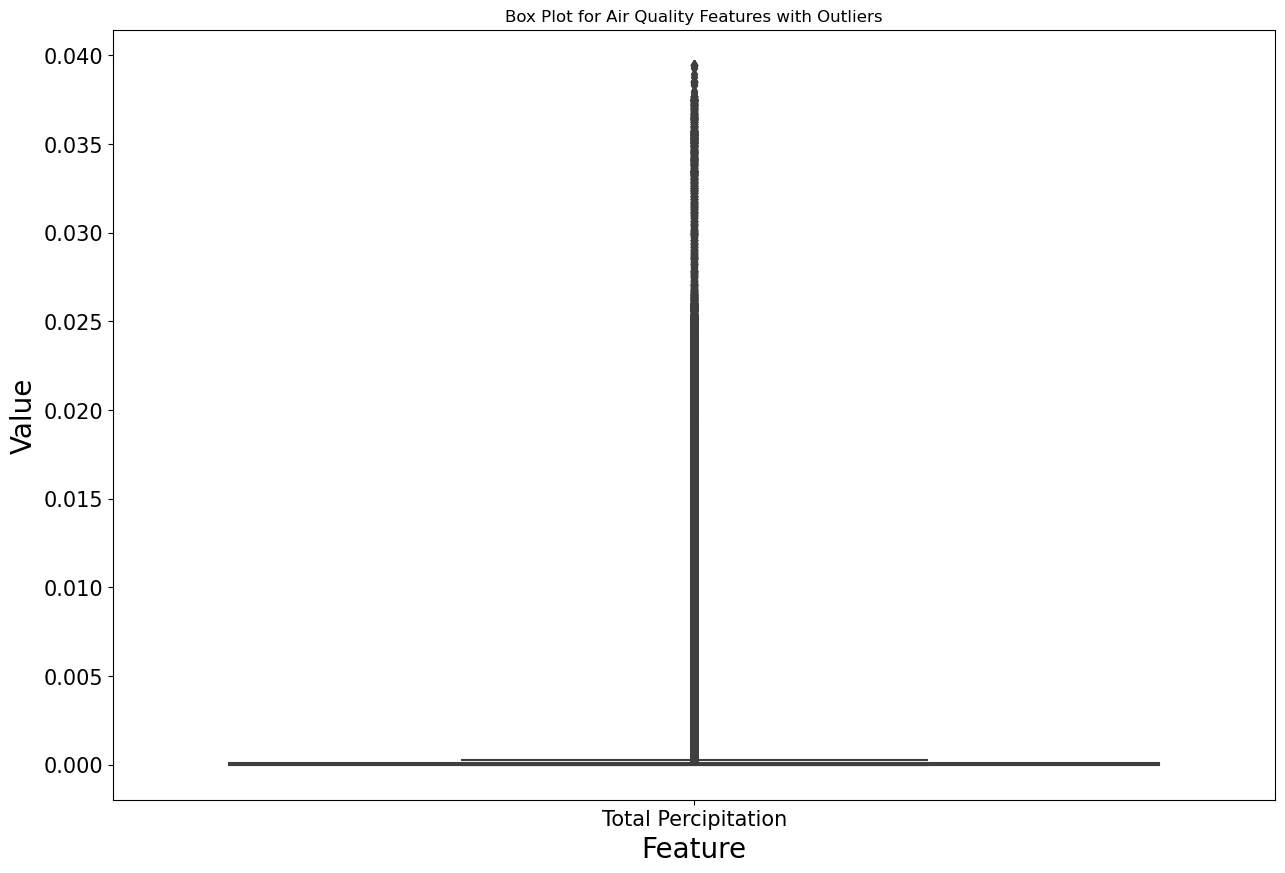

In [19]:

# Melt the DataFrame to long format
df_melted = df2.melt(value_vars=['Total Percipitation'], 
                     var_name='Feature', 
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [15]:
df = pd.concat([df1, df2])

In [16]:
# Sorting the DataFrame by the 'Date' column
df = df.sort_values(by='Date').reset_index(drop=True)


df

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01 00:00:00,19.182842,65.154610,15.043911,11.628475,38.050000,23.950000,Athens CAMS station 19,1.666157,-0.647274,9.679053,17.641805,0.000050,1.697447,1.353098,13.618914,77.171889
1,2020-05-01 00:00:00,7.386327,71.165230,11.410466,7.889841,38.150000,23.950000,Athens CAMS station 14,1.608547,-0.493469,9.436499,17.339710,0.000050,1.588538,1.109098,13.192152,78.034421
2,2020-05-01 00:00:00,10.890930,69.889880,10.032639,8.453507,38.050000,23.550000,Athens CAMS station 15,1.931901,-0.955598,10.870682,18.002995,0.000038,1.918372,1.518000,13.861360,82.222886
3,2020-05-01 00:00:00,12.530855,63.666874,11.838625,9.954234,38.050000,23.650000,Athens CAMS station 16,1.825504,-0.864969,10.444918,17.745293,0.000042,1.628801,1.479182,13.339142,82.714797
4,2020-05-01 00:00:00,53.000000,1.000000,131.000000,13.000000,38.018690,23.810574,PANACEA_005,1.794912,-0.841185,9.950662,17.742396,0.000045,1.481709,0.860578,14.039602,76.442301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144085,2023-10-31 23:00:00,7.000000,59.000000,11.988403,3.000000,43.623906,13.392558,Falconara Alta,-0.578384,-0.669120,10.854955,12.754717,0.011400,2.901160,2.680774,12.481050,89.845833
2144086,2023-10-31 23:00:00,11.118244,50.137924,12.163123,7.220167,43.650000,13.450000,Ancona CAMS Station 3,-0.577543,-0.669832,10.854736,12.752656,0.011403,2.902311,2.679673,12.481108,89.844242
2144087,2023-10-31 23:00:00,11.000000,43.742821,15.000000,4.000000,43.527982,13.246672,Jesi,-0.580880,-0.667032,10.855416,12.760298,0.011396,2.897558,2.684010,12.480573,89.851236
2144088,2023-10-31 23:00:00,9.705607,48.170746,10.697131,7.280790,43.450000,13.450000,Ancona CAMS Station 13,-0.578659,-0.669225,10.851639,12.745957,0.011431,2.896195,2.681406,12.475130,89.861075


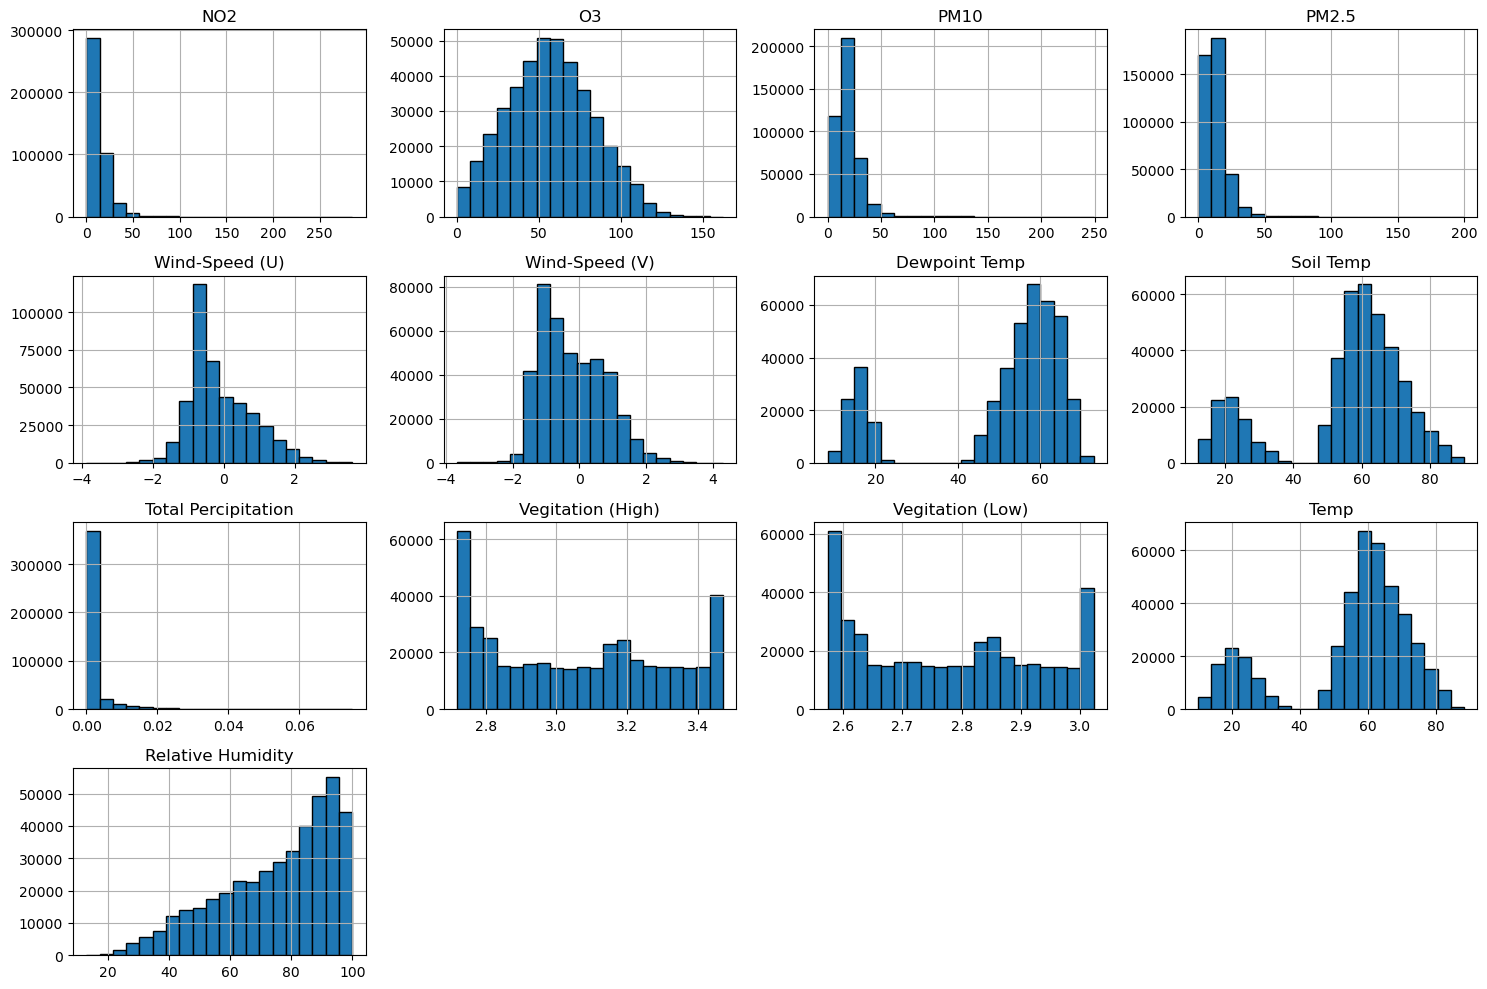

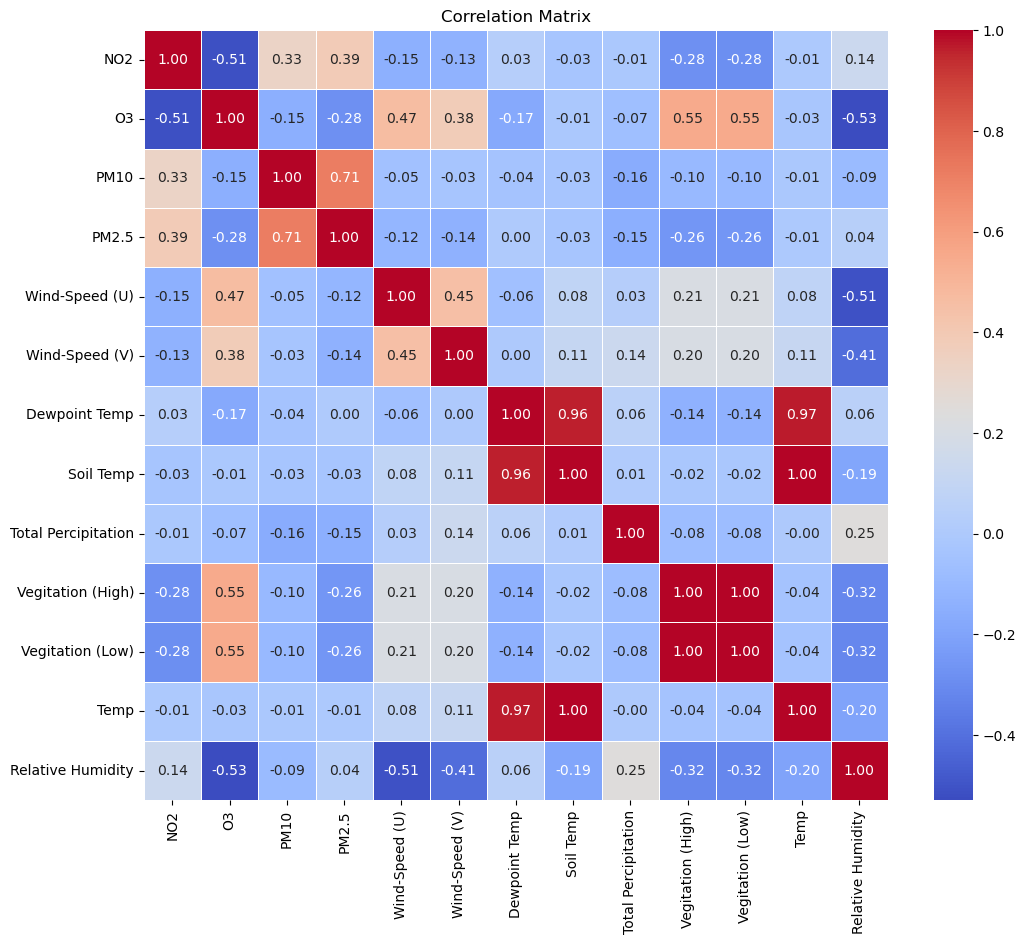

In [17]:
# Convert the 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df1[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Generate and plot the correlation matrix

correlation_matrix = df1[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Convert the 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Set the 'Date' column as the index
df2.set_index('Date', inplace=True)


In [35]:
df_vis = df2

# Ensure all numerical columns are converted to numeric types where necessary
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Latitude', 'Longitude', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df_vis[numerical_columns] = df_vis[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Resample the data to daily averages for numerical columns only
daily_data = df_vis[numerical_columns].resample('D').mean()



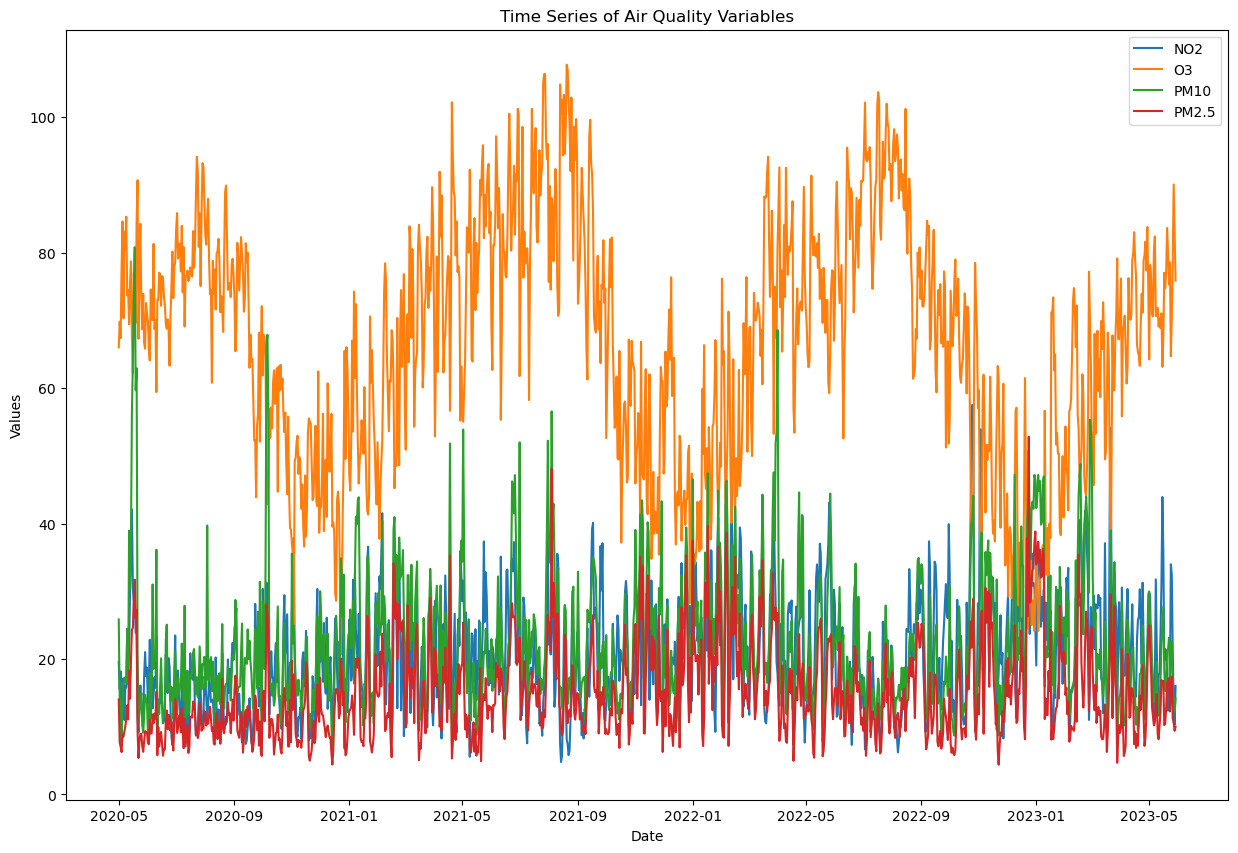

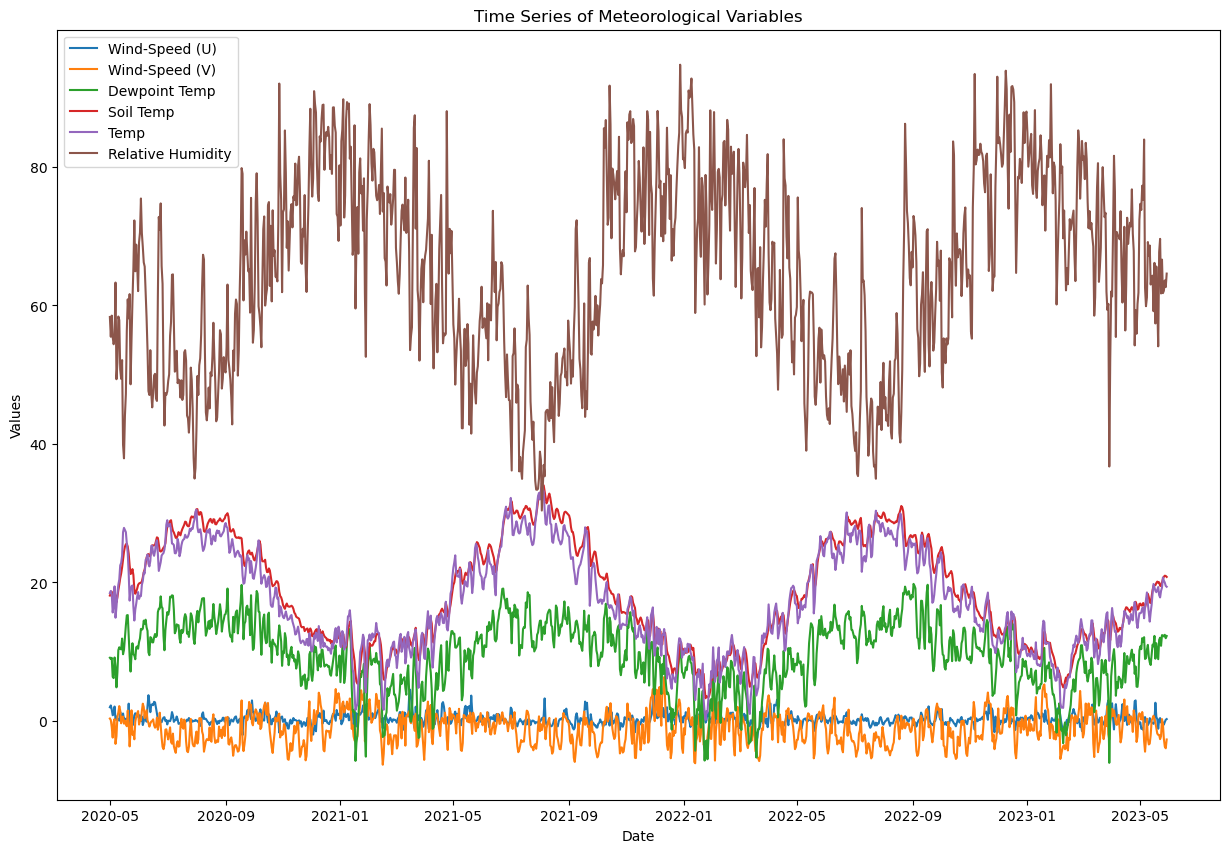

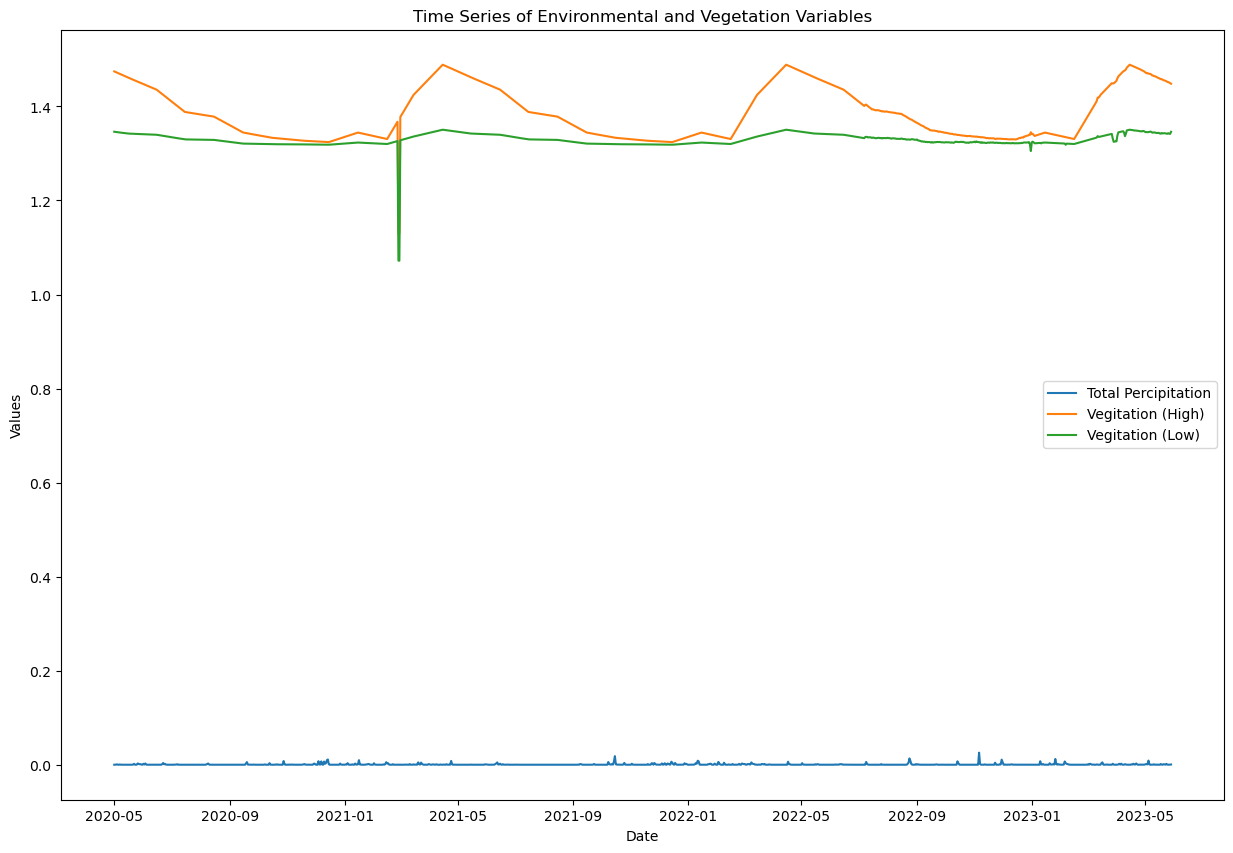

In [36]:
# Plot 1: Time Series Plot for Air Quality Variables
air_quality_vars = ['NO2', 'O3', 'PM10', 'PM2.5']

plt.figure(figsize=(15, 10))
for column in air_quality_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Air Quality Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 2: Time Series Plot for Meteorological Variables
meteorological_vars = ['Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Temp', 'Relative Humidity']

plt.figure(figsize=(15, 10))
for column in meteorological_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Meteorological Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 3: Time Series Plot for Environmental and Vegetation Variables
environmental_vars = ['Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']

plt.figure(figsize=(15, 10))
for column in environmental_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Environmental and Vegetation Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

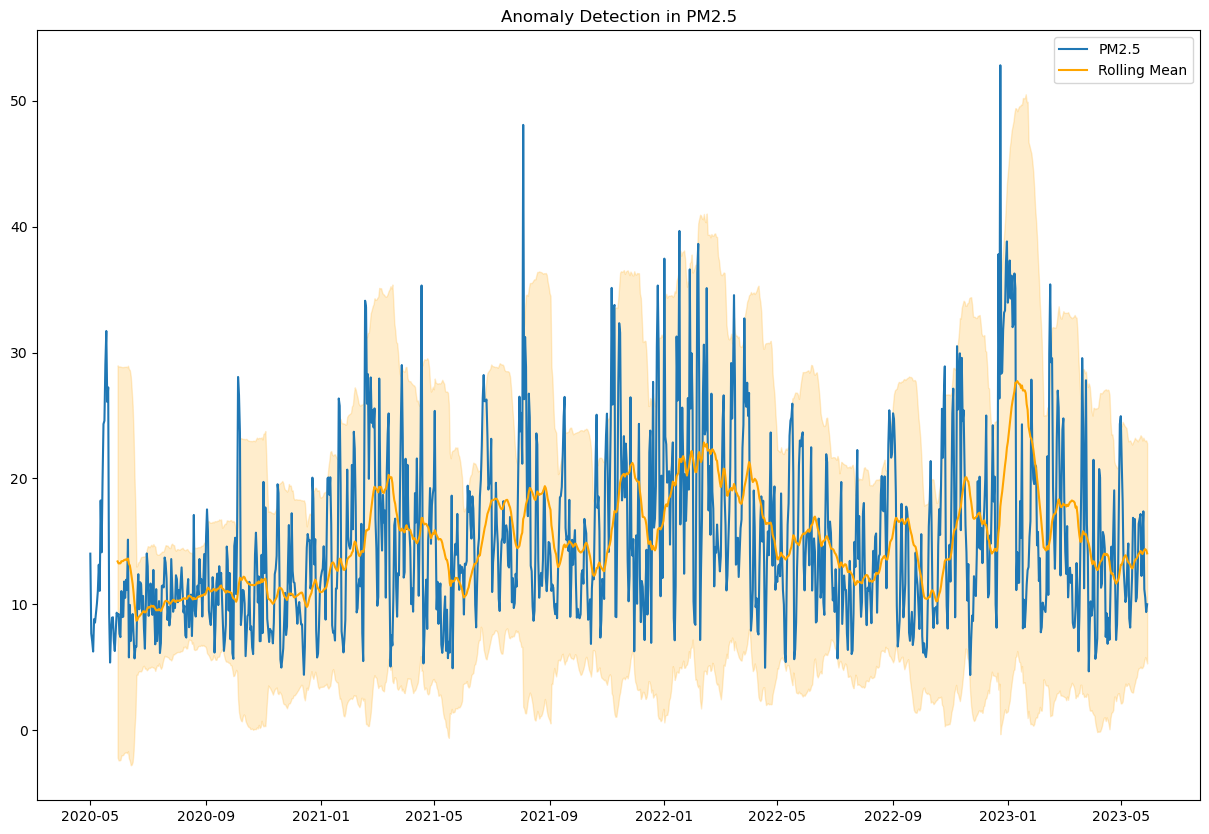

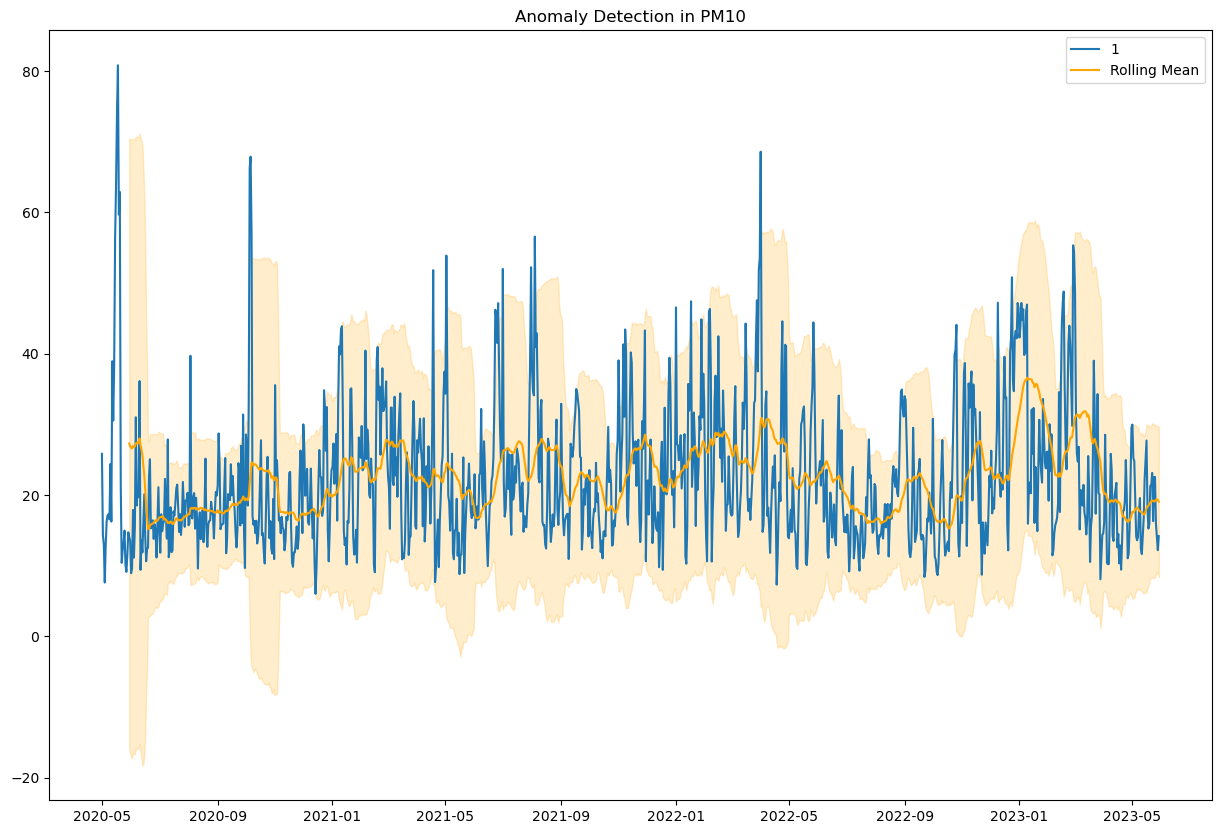

In [37]:
rolling_mean = daily_data.rolling(window=30).mean()
rolling_std = daily_data.rolling(window=30).std()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM2.5'], label='PM2.5')
plt.plot(rolling_mean.index, rolling_mean['PM2.5'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM2.5'] - (2 * rolling_std['PM2.5']), rolling_mean['PM2.5'] + (2 * rolling_std['PM2.5']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM2.5')
plt.show()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM10'], label='1')
plt.plot(rolling_mean.index, rolling_mean['PM10'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM10'] - (2 * rolling_std['PM10']), rolling_mean['PM10'] + (2 * rolling_std['PM10']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM10')
plt.show()

In [39]:
# Define breakpoints for each pollutant
breakpoints = {
    'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
              (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), 
             (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), 
            (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
    'O3': [(0.000, 0.054, 0, 50), (0.055, 0.070, 51, 100), (0.071, 0.085, 101, 150), 
           (0.086, 0.105, 151, 200), (0.106, 0.200, 201, 300)]
}

# Function to calculate sub-index for a given pollutant
def calc_sub_index(concentration, breakpoints):
    for (C_lo, C_hi, I_lo, I_hi) in breakpoints:
        if C_lo <= concentration <= C_hi:
            return ((I_hi - I_lo) / (C_hi - C_lo)) * (concentration - C_lo) + I_lo
    return np.nan

# Function to calculate AQI from pollutant concentrations
def calculate_aqi(row):
    sub_indices = []
    for pollutant in ['PM2.5', 'PM10', 'NO2', 'O3']:
        sub_index = calc_sub_index(row[pollutant], breakpoints[pollutant])
        sub_indices.append(sub_index)
    return max(sub_indices)

# Calculate AQI for each row
df2['AQI'] = df2.apply(calculate_aqi, axis=1)

In [40]:
df2.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI
Date,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896
2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020
2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682
2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583
2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379


In [42]:
# Add a new column to categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df2['AQI_Category'] = df2['AQI'].apply(categorize_aqi)

In [43]:
# Mapping AQI Categories to Numerical Values
aqi_category_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4
}

# Adding a new column with numerical AQI values
df2['AQI_Numerical'] = df2['AQI_Category'].map(aqi_category_mapping)

In [45]:
df2.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
Date,,,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020,Good,1
2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682,Good,1
2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583,Good,1
2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379,Good,1


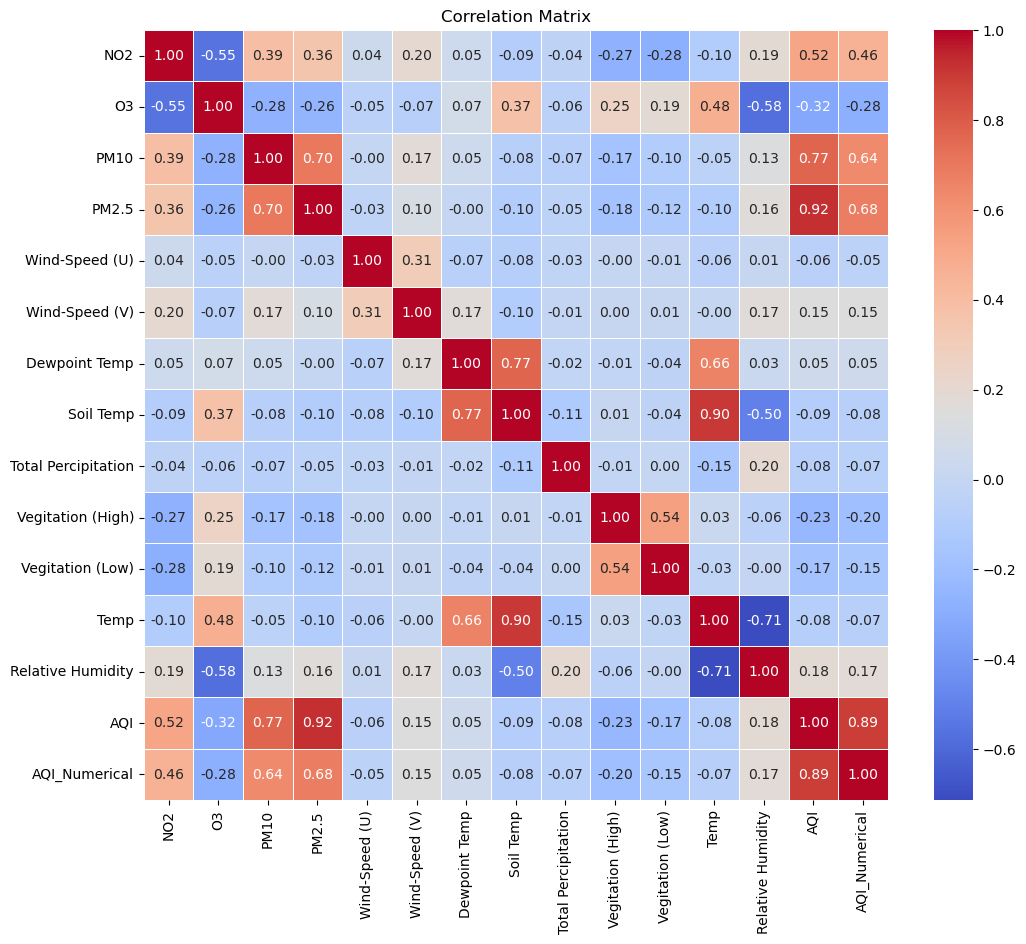

In [47]:
# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity','AQI', 'AQI_Numerical']


# Generate and plot the correlation matrix
correlation_matrix = df2[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [49]:
# Features and target variables
features = ['Latitude', 'Longitude', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation',
            'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity', 'PM2.5', 'PM10', 'NO2', 'O3']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
df2[features] = scaler.fit_transform(df2[features])

# Check the scaled data
df2.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
Date,,,,,,,,,,,,,,,,,,,
2020-05-01,0.010292,0.251740,0.005402,0.003546,1.00000,0.029126,Athens CAMS station 0,0.573138,0.456517,0.614072,0.431076,0.000884,0.803759,0.962796,0.353738,0.809295,25.833896,Good,1
2020-05-01,0.055472,0.245492,0.007015,0.004481,0.10748,0.514563,Athens CAMS station 9,0.592486,0.438761,0.620633,0.454620,0.000942,0.831591,0.467433,0.376893,0.762864,32.653020,Good,1
2020-05-01,0.008407,0.246069,0.005726,0.003606,1.00000,0.271845,Athens CAMS station 1,0.567496,0.458187,0.603930,0.428024,0.001019,0.768328,0.919176,0.345062,0.812168,26.276682,Good,1
2020-05-01,0.054295,0.224083,0.007280,0.004694,0.10748,0.757282,Athens CAMS station 10,0.595876,0.437013,0.617379,0.457007,0.000900,0.838098,0.559783,0.382343,0.743155,34.198583,Good,1
2020-05-01,0.049869,0.223194,0.007570,0.004699,0.10748,1.000000,Athens CAMS station 11,0.591983,0.440039,0.612521,0.455995,0.000923,0.808648,0.696088,0.380544,0.738555,34.239379,Good,1


In [50]:
df2.to_csv('D:/Second semester/Intro to AI/project/dataset/aqi_data.csv', index=False)